In [1]:

import time
import os, sys
import numpy as np
import pandas as pd 
import seaborn as sns
from pathlib import Path
from itertools import product
import matplotlib.pyplot as plt
from types import SimpleNamespace
from sklearn.datasets import make_blobs


In [2]:

np.set_printoptions(suppress=True, precision=5)



In [4]:
sys.path.append("../")


import gdcm.data.generate_synthetic_data as gsd
from gdcm.data.preprocess import preprocess_features
from gdcm.common.utils import load_a_dict, save_a_dict



In [7]:
n_repeats = 10
N = {200, 1000}  #  {1000, 4000}  
K = {5, 15}  # {2, 5, 10, 20}
V = {10}  # {2, 5, 10, 50, 100, 1000}
alphas = set([0.6, 0.8])  # \epsilon OR \alpha in the paper the smaller the more difficult
ps = set([0.6, 0.8])
qs = set([0.2, 0.5])

settings = list(product(N, K, V, alphas, ps, qs))
for l in settings:
    print(l)

print("Number of data sets", len(settings)*n_repeats)



(200, 5, 10, 0.6, 0.6, 0.2)
(200, 5, 10, 0.6, 0.6, 0.5)
(200, 5, 10, 0.6, 0.8, 0.2)
(200, 5, 10, 0.6, 0.8, 0.5)
(200, 5, 10, 0.8, 0.6, 0.2)
(200, 5, 10, 0.8, 0.6, 0.5)
(200, 5, 10, 0.8, 0.8, 0.2)
(200, 5, 10, 0.8, 0.8, 0.5)
(200, 15, 10, 0.6, 0.6, 0.2)
(200, 15, 10, 0.6, 0.6, 0.5)
(200, 15, 10, 0.6, 0.8, 0.2)
(200, 15, 10, 0.6, 0.8, 0.5)
(200, 15, 10, 0.8, 0.6, 0.2)
(200, 15, 10, 0.8, 0.6, 0.5)
(200, 15, 10, 0.8, 0.8, 0.2)
(200, 15, 10, 0.8, 0.8, 0.5)
(1000, 5, 10, 0.6, 0.6, 0.2)
(1000, 5, 10, 0.6, 0.6, 0.5)
(1000, 5, 10, 0.6, 0.8, 0.2)
(1000, 5, 10, 0.6, 0.8, 0.5)
(1000, 5, 10, 0.8, 0.6, 0.2)
(1000, 5, 10, 0.8, 0.6, 0.5)
(1000, 5, 10, 0.8, 0.8, 0.2)
(1000, 5, 10, 0.8, 0.8, 0.5)
(1000, 15, 10, 0.6, 0.6, 0.2)
(1000, 15, 10, 0.6, 0.6, 0.5)
(1000, 15, 10, 0.6, 0.8, 0.2)
(1000, 15, 10, 0.6, 0.8, 0.5)
(1000, 15, 10, 0.8, 0.6, 0.2)
(1000, 15, 10, 0.8, 0.6, 0.5)
(1000, 15, 10, 0.8, 0.8, 0.2)
(1000, 15, 10, 0.8, 0.8, 0.5)
Number of data sets 320


In [7]:


n_repeats = 10
N = {2000}  #  {1000, 4000}  
K = {5, 15}  # {2, 5, 10, 20}
V = {10}  # {2, 5, 10, 50, 100, 1000}
alphas = set([0.35, 0.65, 0.95])  # \epsilon OR \alpha in the paper the smaller the more difficult


settings = list(product(N, K, V, alphas))
for l in settings:
    print(l)

print("Number of data sets", len(settings)*n_repeats)



(2000, 5, 10, 0.35)
(2000, 5, 10, 0.65)
(2000, 5, 10, 0.95)
(2000, 15, 10, 0.35)
(2000, 15, 10, 0.65)
(2000, 15, 10, 0.95)
Number of data sets 60


In [23]:

n_repeats = 10
N = {1000, 3000}  
K ={2, 10, 20} 
V = {2, 5, 10, 15 , 20, 200 }
alphas = set([0.4, 0.8])  # \epsilon OR \alpha in the paper the smaller the more difficult


settings = list(product(N, K, V, alphas))
for l in settings:
    print(l)

print("Number of data sets", len(settings)*n_repeats)

(1000, 2, 2, 0.4)
(1000, 2, 2, 0.8)
(1000, 2, 20, 0.4)
(1000, 2, 20, 0.8)
(1000, 2, 5, 0.4)
(1000, 2, 5, 0.8)
(1000, 2, 200, 0.4)
(1000, 2, 200, 0.8)
(1000, 2, 10, 0.4)
(1000, 2, 10, 0.8)
(1000, 2, 15, 0.4)
(1000, 2, 15, 0.8)
(1000, 10, 2, 0.4)
(1000, 10, 2, 0.8)
(1000, 10, 20, 0.4)
(1000, 10, 20, 0.8)
(1000, 10, 5, 0.4)
(1000, 10, 5, 0.8)
(1000, 10, 200, 0.4)
(1000, 10, 200, 0.8)
(1000, 10, 10, 0.4)
(1000, 10, 10, 0.8)
(1000, 10, 15, 0.4)
(1000, 10, 15, 0.8)
(1000, 20, 2, 0.4)
(1000, 20, 2, 0.8)
(1000, 20, 20, 0.4)
(1000, 20, 20, 0.8)
(1000, 20, 5, 0.4)
(1000, 20, 5, 0.8)
(1000, 20, 200, 0.4)
(1000, 20, 200, 0.8)
(1000, 20, 10, 0.4)
(1000, 20, 10, 0.8)
(1000, 20, 15, 0.4)
(1000, 20, 15, 0.8)
(3000, 2, 2, 0.4)
(3000, 2, 2, 0.8)
(3000, 2, 20, 0.4)
(3000, 2, 20, 0.8)
(3000, 2, 5, 0.4)
(3000, 2, 5, 0.8)
(3000, 2, 200, 0.4)
(3000, 2, 200, 0.8)
(3000, 2, 10, 0.4)
(3000, 2, 10, 0.8)
(3000, 2, 15, 0.4)
(3000, 2, 15, 0.8)
(3000, 10, 2, 0.4)
(3000, 10, 2, 0.8)
(3000, 10, 20, 0.4)
(3000, 10, 20,

In [10]:

# Generate and save synthetic data sets
for setting in settings:
    n = setting[0]
    k = setting[1]
    v = setting[2]
    alpha = setting[3]
    cardinalities = gsd.clusters_cardinality(n, k)

    for r in range(1, n_repeats+1):  # number of repeats

        # data_name: n=2000_k=10_v=10_alpha=0.5_44
        data_name = "n=" + str(n) + "_" + "k=" + str(k) + "_" + "v=" \
        + str(v) + "_" + "alpha=" + str(alpha)+ "_" + str(r)
        print(f"data_name: {data_name}")

        if not os.path.exists(os.path.join("../Datasets/F/synthetic", data_name)):
            os.mkdir(os.path.join("../Datasets/F/synthetic", data_name))
            
        x_, xn_ = gsd.generate_quantitative_features(n=n, v=v, 
                                                   n_clusters=k, alpha=alpha,
                                                   cardinality=cardinalities, 
                                                   v_noise1= int(np.floor(v/2))
                                                  )
        y_ = gsd.flat_ground_truth(cardinalities)
        
        shuffled_idx = gsd.shuffler(n)
        
        x = x_[shuffled_idx, :]
        xn = xn_[shuffled_idx, :]
        y = y_[shuffled_idx]
        
        df_x = pd.DataFrame(data=x, )
        df_xn = pd.DataFrame(data=xn, )
        df_y = pd.DataFrame(data=y.reshape(-1, 1), )

        df_x.to_csv("../Datasets/F/synthetic/" + data_name + "/data.csv", header=False, index=False)
        df_xn.to_csv("../Datasets/F/synthetic/" + data_name + "/data_noise.csv", header=False, index=False)
        df_y.to_csv("../Datasets/F/synthetic/" + data_name + "/labels.csv", header=False, index=False)
       

data_name: n=1000_k=2_v=15_alpha=0.4_1
data_name: n=1000_k=2_v=15_alpha=0.4_2
data_name: n=1000_k=2_v=15_alpha=0.4_3
data_name: n=1000_k=2_v=15_alpha=0.4_4
data_name: n=1000_k=2_v=15_alpha=0.4_5
data_name: n=1000_k=2_v=15_alpha=0.4_6
data_name: n=1000_k=2_v=15_alpha=0.4_7
data_name: n=1000_k=2_v=15_alpha=0.4_8
data_name: n=1000_k=2_v=15_alpha=0.4_9
data_name: n=1000_k=2_v=15_alpha=0.4_10
data_name: n=1000_k=2_v=15_alpha=0.8_1
data_name: n=1000_k=2_v=15_alpha=0.8_2
data_name: n=1000_k=2_v=15_alpha=0.8_3
data_name: n=1000_k=2_v=15_alpha=0.8_4
data_name: n=1000_k=2_v=15_alpha=0.8_5
data_name: n=1000_k=2_v=15_alpha=0.8_6
data_name: n=1000_k=2_v=15_alpha=0.8_7
data_name: n=1000_k=2_v=15_alpha=0.8_8
data_name: n=1000_k=2_v=15_alpha=0.8_9
data_name: n=1000_k=2_v=15_alpha=0.8_10
data_name: n=1000_k=10_v=15_alpha=0.4_1
data_name: n=1000_k=10_v=15_alpha=0.4_2
data_name: n=1000_k=10_v=15_alpha=0.4_3
data_name: n=1000_k=10_v=15_alpha=0.4_4
data_name: n=1000_k=10_v=15_alpha=0.4_5
data_name: n=1000_

In [11]:
y_

array([ 1,  1,  1, ..., 20, 20, 20])

In [12]:
yy = y_[shuffled_idx] 

In [13]:
np.all(yy == y)

True

In [14]:
setting

(3000, 20, 15, 0.8)

In [15]:
x

array([[ 0.65 ,  0.364, -0.251, ..., -0.552,  0.721,  0.522],
       [ 0.628,  0.47 , -0.306, ..., -0.533, -0.917,  1.06 ],
       [ 0.582,  0.035,  1.018, ..., -0.485,  0.055, -0.045],
       ...,
       [-0.425,  0.255,  0.038, ..., -0.558, -0.813,  0.33 ],
       [ 0.602,  0.691, -0.399, ..., -0.48 ,  0.29 ,  0.04 ],
       [-0.182,  0.55 , -0.069, ..., -0.496, -0.872,  0.171]])

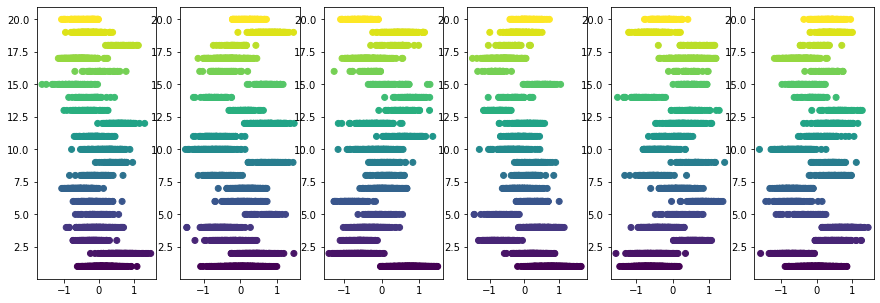

In [16]:


fig = plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 6, 1)
ax.scatter(x[:, 0], y, c=y)

ax = plt.subplot(1, 6, 2,)
ax.scatter(x[:, 1], y, c=y)


ax = plt.subplot(1, 6, 3)
ax.scatter(x[:, 2], y, c=y)

ax = plt.subplot(1, 6, 4)
ax.scatter(x[:, 3], y, c=y)

ax = plt.subplot(1, 6, 5)
ax.scatter(xn[:, 11], y, c=y)


ax = plt.subplot(1, 6, 6)
ax.scatter(xn[:, 13], y, c=y)


plt.show()



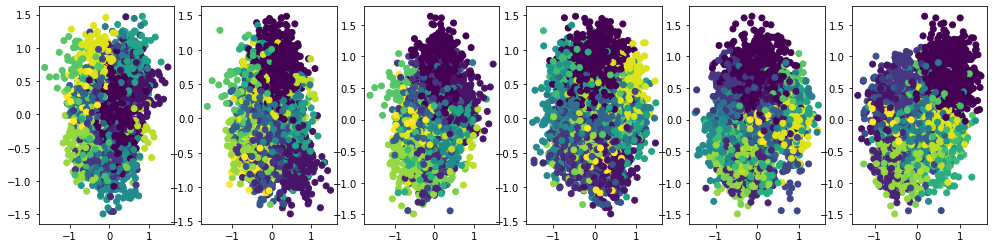

In [17]:



fig = plt.figure(figsize=(17, 4))

ax = plt.subplot(1, 6, 1)
ax.scatter(x[:, 0], x[:, 1], c=y)

ax = plt.subplot(1, 6, 2)
ax.scatter(x[:, 0], x[:, 2], c=y)

ax = plt.subplot(1, 6, 3)
ax.scatter(x[:, 0], x[:, 3], c=y)

ax = plt.subplot(1, 6, 4)
ax.scatter(x[:, 1], x[:, 2], c=y)

ax = plt.subplot(1, 6, 5)
ax.scatter(x[:, 1], x[:, 3], c=y)

ax = plt.subplot(1, 6, 6)
ax.scatter(x[:, 2], x[:, 3], c=y)




plt.show()




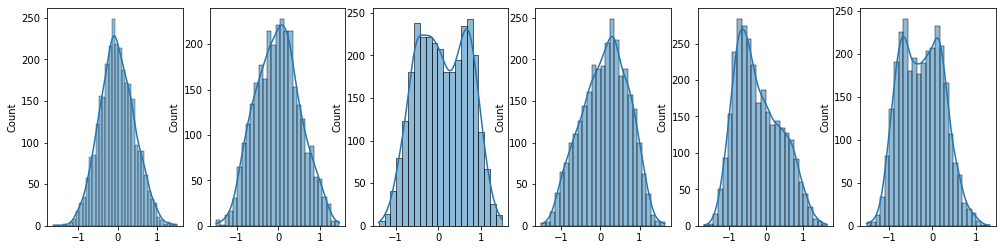

In [18]:



fig = plt.figure(figsize=(17, 4))

ax = plt.subplot(1, 6, 1)
sns.histplot(x[:, 0], kde=True,)

ax = plt.subplot(1, 6, 2)
sns.histplot(x[:, 1], kde=True,)



ax = plt.subplot(1, 6, 3)
sns.histplot(x[:, 2], kde=True,)




ax = plt.subplot(1, 6, 4)
sns.histplot(x[:, 3], kde=True,)




ax = plt.subplot(1, 6, 5)
sns.histplot(x[:, 4], kde=True,)




ax = plt.subplot(1, 6, 6)
sns.histplot(x[:, 5], kde=True,)



plt.show()





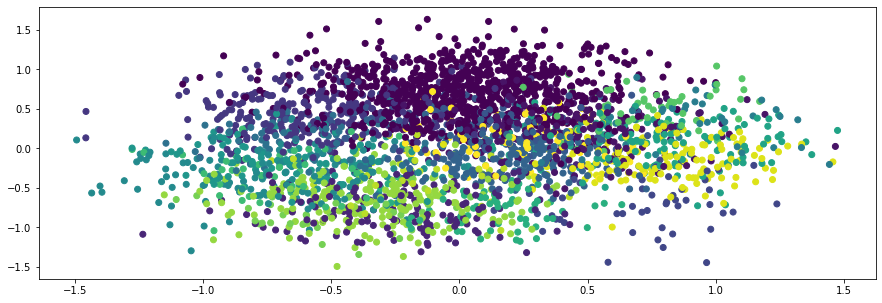

In [19]:
plt.figure(figsize=(15, 5))
plt.scatter(x[:, 1], x[:, 3], c=y)

plt.show()

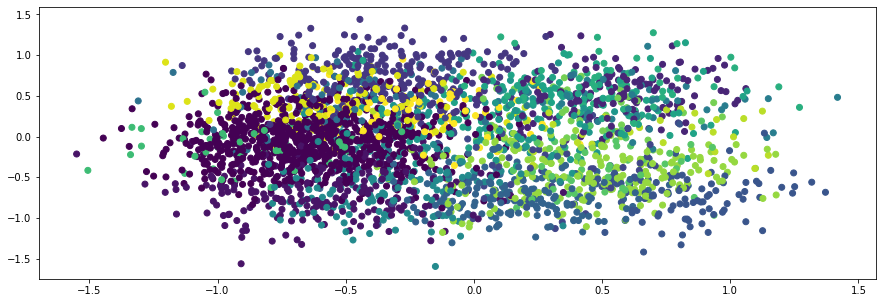

In [20]:
plt.figure(figsize=(15, 5))
plt.scatter(xn[:, 11], xn[:, 13], c=y)

plt.show()

In [21]:
np.unique(y), len(y), x.shape

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 3000,
 (3000, 15))

In [22]:
y

array([12,  2,  1, ...,  7, 12,  7])

In [37]:


configs = {
    "results_path": Path("/home/soroosh/Programmes/gdcm/Results"),
    "figures_path": Path("/home/soroosh/Programmes/gdcm/Figures"),
    "params_path": Path("/home/soroosh/Programmes/gdcm/Params"),
    "data_path": Path("/home/soroosh/Programmes/gdcm/Datasets"),
    "n_repeats": 2,
    "n_splits": 0,
}

configs = SimpleNamespace(**configs)


In [ ]:

project = "RGDF"
tag = "y=test0"
algorithm_name = "gdcm_f"
pp = "mm"

run = 1 
n_clusters = 5
verbose = 2
max_iter = 12
tol_tau = 1.
tol_sigma = 0.4


step_size = 0.1
p_value = 2

update_per_data = True

window_len = 4 

init = "user"

centroids_idx = [10, 130, 501, 123, 801]# [c0, c1, c2, c3, c4]


In [ ]:


print(
    "configuration: \n"
    f"  run: {run} \n"
    f"  algorithm: {algorithm_name} \n"
    f"  pre-processing: {pp} \n"
    f"  step_size: {step_size} \n"
    f"  p-value: {p_value} \n"
    f"  update_per_data {update_per_data} \n"
    f"  window_len: {window_len} \n"
    f"  init: {init} \n"
    f"  centroids idx: {centroids_idx} \n"
)

   

In [ ]:


data_name="n=1000_k=2_v=2_ws=0.5_random"

# Adding some details for the sake of clarity in storing and visualization
configs.run = run
configs.project = project
configs.tag = tag
specifier = " -alg: " + algorithm_name + \
            " -data: " + data_name + \
            " -update_per_data: " + str(update_per_data) + \
            " -step_size: " + str(step_size) + \
            " -window_len: " + str(window_len) + \
            " -p: " + str(p_value) + \
            " -tau: " + str(tol_tau) + \
            " -sigma: " + str(tol_sigma) + \
            " -init: " + init 

configs.specifier = specifier
configs.data_name = data_name
configs.n_clusters = n_clusters



In [ ]:


configs



In [ ]:

configs.specifier



In [ ]:

configs



In [ ]:
centroids_idx = [0, 16, 20, 39, 55]
configs.centroids_idx = centroids_idx



In [ ]:


data_name="n=1000_k=2_v=50_ws=0.5_random"



# to add the repeat numbers to the data_name variable for synthetic data
if "n=" in data_name or "k=" in data_name or "v=" in data_name:
    synthetic_data = True
else:
    synthetic_data = False

if run == 1:
    results = {}
    for repeat in range(1, configs.n_repeats):
        repeat = str(repeat)
        results[repeat] = {}

        if algorithm_name.split("_")[-1].lower() == "f":
            print(
                "clustering features_only data: " + data_name, "\n"
            )

            from gdcm.data.load_data import FeaturesData
            from gdcm.algorithms.relaxed_gradient_descent_clustering import gdcmf

            if synthetic_data is True:
                dir_ = "F/synthetic"
                data_name = data_name + "_" + repeat
            else:
                dir_ = "F"

            data_path = os.path.join(configs.data_path, dir_)
            fd = FeaturesData(name=data_name, path=data_path)

            x, y_true = fd.get_dataset()
            results[repeat]['y_true'] = y_true

            x = preprocess_features(x=x, pp=pp)
            n_clusters = len(np.unique(y_true))
            configs.n_clusters = n_clusters

            # instantiate and fit
            start = time.process_time()
            gdcm = gdcmf(
                n_clusters=n_clusters,
                init=init,
                p=p_value,
                n_init=1,
                verbose=verbose,
                max_iter=max_iter,
                tol_tau=tol_tau,
                tol_sigma=tol_sigma,
                step_size=step_size,
                window_len=window_len,
                # step_size_decay=step_size_decay,  # not considered yet
                # reinitialize=True,  # not considered yet
                centroids_idx=configs.centroids_idx[:n_clusters],
                # decrease_step_size=False,  # not considered yet
                # when_to_reinitialize=40,  # not considered yet
                update_per_data_point=True,
            )
            y_pred = gdcm.fit(x=x, distance_fn=gdcm.minkowski_fn, y=y_true)
            end = time.process_time()
            
            # save results and logs
            results[repeat]['time'] = end-start
            results[repeat]['y_pred'] = y_pred
            configs.stop_type = gdcm.stop_type


In [ ]:


gdcm.centroids



In [ ]:

gdcm.minkowski_fn(x[0, :], x[0, :], 2)


In [ ]:

gdcm.minkowski_fn(x[0, :], x[16, :], 2)



In [ ]:


centroids_idx[:n_clusters]



In [ ]:
centroids = x[centroids_idx[:n_clusters], :]
centroids


In [ ]:
centroids = centroids + 1e-6
centroids

In [ ]:
1e-10

In [ ]:
import jax.numpy as jnp
import jax

distance_fn = gdcm.minkowski_fn

In [ ]:
data_point = x[0, :]

distances = jnp.asarray([
                        distance_fn(data_point=data_point, centroid=centroid, p=2) for centroid in centroids
                    ])


In [ ]:
distances

In [ ]:
k = jnp.argmin(distances, axis=0)
k

In [ ]:
centroids[k, :]

In [ ]:

jax.jacfwd(distance_fn, argnums=(1,))(data_point, centroids[k, :], 2)


In [ ]:

gdcm.centroids_idx


In [ ]:
idx = gdcm._initiate_centroids_idx(x, gdcm.minkowski_fn) 
idx


In [ ]:

centroids = x[idx, :]
centroids



In [ ]:
gdcm.compute_inertia(m=x)



In [ ]:


gdcm.centroids 



In [ ]:


gdcm.clusters 



In [ ]:


gdcm.n_clusters



In [ ]:

gdcm.max_iter



In [ ]:

tol_tau


In [ ]:

a = load_a_dict(configs.specifier, configs.params_path)
a



In [ ]:



r = load_a_dict(configs.specifier, configs.results_path)
r



In [ ]:


gdcm.best_ari



In [ ]:


gdcm.best_inertia



In [ ]:

gdcm.best_clusters



In [ ]:


len(gdcm.best_iter_gradients_history), len(gdcm.best_iter_hessians_history), len(gdcm.best_iter_aris_history), len(gdcm.best_iter_inertias_history)



In [ ]:

len(gdcm.grads_history), len(gdcm.hessians_history), len(gdcm.aris_history),  len(gdcm.inertias_history)


In [ ]:

gdcm.stop_type



In [ ]:
gdcm.inertias_history

In [ ]:
gdcm.centroids

In [ ]:
x[gdcm.centroids_idx, :]

In [ ]:

t = np.random.choice(a=[0, 1, 2], size=100, replace=True)


sum(
                    [
                        np.sum(
                            np.power(x[np.where(t == k)] - gdcm.centroids[k], 2)
                        )
                        for k in range(gdcm.n_clusters)
                    ]
                )



In [ ]:

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
ax.plot(gdcm.best_iter_aris_history, c='b')
ax.plot(gdcm.best_iter_inertias_history, c='k')
ax.plot(gdcm.best_iter_gradients_history, c='g')
ax.plot(gdcm.best_iter_hessians_history, c='m')
ax.legend(["ARI", "Inertia", "Grad", "Hess"])
plt.title("Best Iteration")
plt.show()


In [ ]:

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
ax.plot(gdcm.aris_history, c='b')
ax.plot(gdcm.inertias_history, c='k')
ax.plot(gdcm.grads_history, c='g')
ax.plot(gdcm.hessians_history, c='m')
ax.legend(["ARI", "Inertia", "Grad", "Hess"])
plt.title("All Iterations")
plt.show()



In [ ]:

plt.plot(gdcm.inertias_history/max(gdcm.inertias_history), c='k')
plt.plot(gdcm.inertias_history, c='r')



In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
ax.plot(gdcm.aris_history, c='b', alpha=0.7)
ax.plot(gdcm.inertias_history/max(gdcm.inertias_history), c='k')
ax.plot(gdcm.grads_history/max(gdcm.grads_history), c='g', alpha=0.6)
ax.plot(gdcm.hessians_history, c='m', lw=0.05, alpha=0.5)
ax.legend(["ARI", "Inertia", "Grad", "Hess"])
plt.title("All Iterations")
plt.show()



In [ ]:

to_show_low = 0
to_show_up = 1000

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
ax.plot(
    gdcm.aris_history[to_show_low:to_show_up], c='b'
)
ax.plot(
    gdcm.inertias_history[to_show_low:to_show_up], c='k'
)
ax.plot(
    gdcm.grads_history[to_show_low:to_show_up], c='g'
)
ax.plot(
    gdcm.hessians_history[to_show_low:to_show_up], c='m'
)

ax.legend(
    ["ARI", "Inertia", "Grad", "Hess"]
)
plt.title("A selection Iterations")
plt.show()





In [ ]:



fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
ax.plot(gdcm.aris_history, c='b')
ax.plot(gdcm.grads_history, c='g')
ax.legend(["ARI", "Grad", ])
plt.title("All Iterations")
plt.show()




In [ ]:
g = np.asarray(gdcm.grads_history)
i = np.asanyarray(gdcm.inertias_history)
mu = g.mean()
std = g.std()
t = np.arange(g.shape[0])

fig = plt.figure(figsize=(13, 5))
ax = plt.subplot(1, 1, 1)
ax.plot(t, g, c='b', lw=2, label="Grads")
ax.fill_between(x=t, y1=g+std, y2=g-std, label= "Ave ± std" , facecolor='y', alpha=0.5)

plt.title("Gradient behaviour")
plt.show()




In [ ]:

print(
    "Iter1: ", f"Grad: {g[:100].mean():.3f}±{g[:100].std():.3f}" 
    f" Inertia: {i[:100].mean():.3f}±{i[:100].std():.3f}""\n" 
    "Iter2:", f" Grad: {g[100:].mean():.3f}±{g[100:].std():.3f}" 
    f" Inertia: {i[100:].mean():.3f}±{i[100:].std():.3f}"
)


In [ ]:


fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
ax.plot(gdcm.aris_history, c='b')
# ax.plot(gdcm.inertias_history, c='k')
ax.plot(gdcm.grads_history, c='g')
ax.plot(gdcm.hessians_history, c='m')
ax.legend(["ARI", "Grad", "Hess"])
plt.title("All Iterations")
plt.show()




In [ ]:

to_show_low = 1000
to_show_up = 2400

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
ax.plot(
    gdcm.aris_history[to_show_low:to_show_up], c='b'
)
ax.plot(
    gdcm.inertias_history[to_show_low:to_show_up], c='k'
)
ax.plot(
    gdcm.grads_history[to_show_low:to_show_up], c='g'
)
ax.plot(
    gdcm.hessians_history[to_show_low:to_show_up], c='m'
)

ax.legend(
    ["ARI", "Inertia", "Grad", "Hess"]
)
plt.title("A selection Iterations")
plt.show()



In [ ]:


np.asarray(gdcm.inertias_history[to_show_low:to_show_up]).mean(), np.asarray(gdcm.inertias_history[to_show_low:to_show_up]).std()



In [ ]:


data_name = "N=1000_K=5_V=10_WS=1.0_Uniform_1"

from gdcm.data.load_data import FeaturesData
from gdcm.algorithms.relaxed_gradient_descent_clustering import gdcmf

data_path = os.path.join(configs.data_path, "F/synthetic")
fd = FeaturesData(name=data_name, path=data_path)

x, y_true = fd.get_dataset()

In [ ]:
x = preprocess_features(x=x, pp=pp)



In [ ]:
def compute_inertia(m, clusters, centroids, n_clusters):
    return sum(
        [np.sum(np.power(m[np.where(clusters == k)] - centroids[k], 2)) for k in range(n_clusters)]
    )


In [ ]:
centroids_idx = [
        0, 16, 53, 71, 87, 99, 105, 118, 120, 121, 125, 132, 143, 159,
        165, 178, 206, 228, 233, 245, 254, 255, 269, 272, 275, 286, 301,
        310, 325, 327, 74, 303, 454, 1027, 1071, 1250, 1345, 1540, 1803, 1812
]

In [ ]:
for i in range(1, 51):
    V = str(2)
    n_clusters = 10
    
    data_name = "N=1000_K="+ str(n_clusters)+"_V="+V+"_WS=1.0_Uniform_"+str(i)
    data_path = os.path.join(configs.data_path, "F/synthetic")
    fd = FeaturesData(name=data_name, path=data_path)
    x, y_true = fd.get_dataset()
    x = preprocess_features(x=x, pp=pp)
    
    a = np.arange(0, x.shape[0])

    clusters = np.random.choice(a, size=x.shape[0], replace=False)
    centroids = centroids_idx[:n_clusters]

    print(
        "repeat:", i, compute_inertia(m=x, clusters=clusters, centroids=centroids, n_clusters=n_clusters)
    )
    print(" ")



- "N=1000_K=2_V=10_WS=1.0_Uniform: 503 (629) || V=5: 120,4 (164,0) || V=10: 239,4 (299,4) || V=50: 121,51 (154,59)

- "N=1000_K=5_V=10_WS=1.0_Uniform: 31095 (490) || V=5: 773,44 (139,2) || V=10: 155,160 (315,0) || V=50: 772,215 (166,35) 

- "N=1000_K=10_V=10_WS=1.0_Uniform: 786,795 (587) || V=5: 393028 (151,4) || V=10: 786092 (330,5) || V=50: 393,449,3 (159,80)

- "N=1000_K=20_V=10_WS=1.0_Uniform: 423,3048 (666) || V=5: 211,5919 || V=10: 4233,337 (3209) || V=50: 211,658,90 (157,50)





In [ ]:
scatter = np.power(x, 2).sum()
scatter


In [ ]:

n_clusters

In [ ]:

compute_inertia(m=x, clusters=gdcm.clusters, centroids=gdcm.centroids, n_clusters=n_clusters)


In [ ]:

centroids=gdcm.centroids


In [ ]:

centroids
